# Probability Distribution Function

## Dice Sum Distribution Visualization

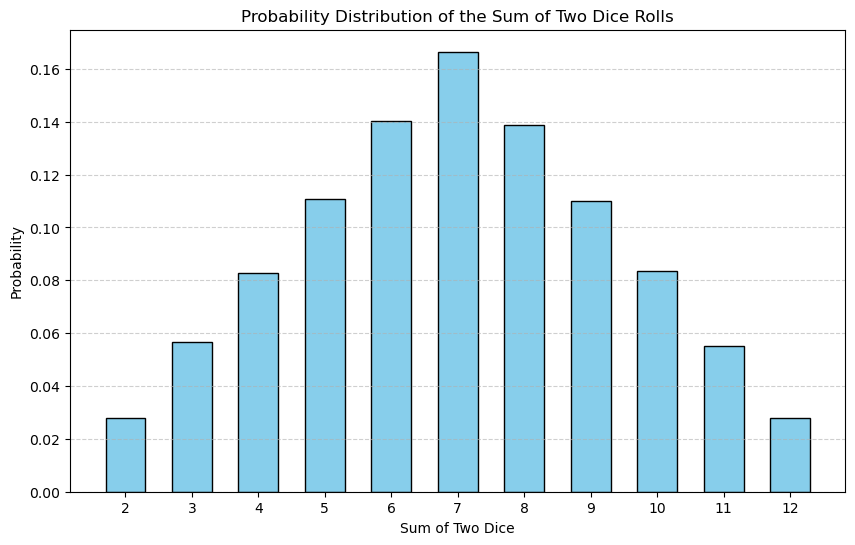

In [3]:
import random
import matplotlib.pyplot as plt
from collections import Counter

# Simulate rolling two dice 100,000 times
num_trials = 100_000
sums = [random.randint(1, 6) + random.randint(1, 6) for _ in range(num_trials)]

# Count frequencies of each sum
sum_counts = Counter(sums)

# Sort by sum
sorted_sums = sorted(sum_counts.items())
x_vals = [item[0] for item in sorted_sums]
y_vals = [item[1] / num_trials for item in sorted_sums]  # Convert to probabilities

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x_vals, y_vals, width=0.6, color='skyblue', edgecolor='black')
plt.title('Probability Distribution of the Sum of Two Dice Rolls')
plt.xlabel('Sum of Two Dice')
plt.ylabel('Probability')
plt.xticks(range(2, 13))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig('../images/dice_example.png')

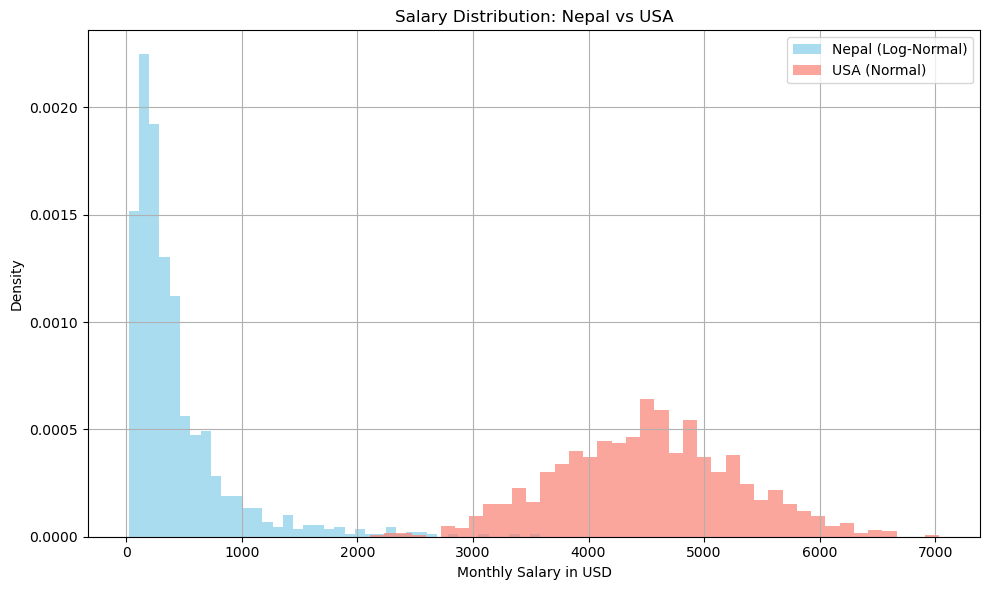

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

# Nepal: Log-normal distribution (skewed)
np.random.seed(0)
nepal_salaries = lognorm(s=0.9, scale=np.exp(5.7)).rvs(1000)

# USA: Normal distribution
usa_salaries = norm(loc=4500, scale=800).rvs(1000)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(nepal_salaries, bins=40, alpha=0.7, label='Nepal (Log-Normal)', color='skyblue', density=True)
plt.hist(usa_salaries, bins=40, alpha=0.7, label='USA (Normal)', color='salmon', density=True)

plt.title("Salary Distribution: Nepal vs USA")
plt.xlabel("Monthly Salary in USD")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../images/npvsus.png')


## CDF of PMF

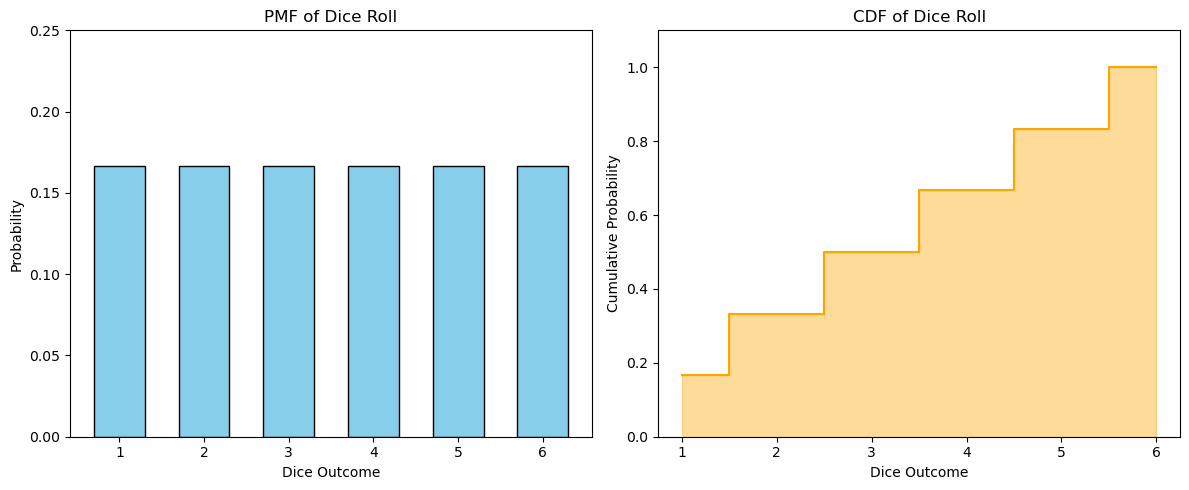

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.arange(1, 7)  # Dice outcomes: 1 to 6
pmf = np.full_like(x, 1/6, dtype=float)  # All probabilities = 1/6
cdf = np.cumsum(pmf)  # Cumulative probabilities

# Plotting
plt.figure(figsize=(12, 5))

# PMF plot using histogram
plt.subplot(1, 2, 1)
plt.bar(x, pmf, width=0.6, color='skyblue', edgecolor='black')
plt.title("PMF of Dice Roll")
plt.xlabel("Dice Outcome")
plt.ylabel("Probability")
plt.ylim(0, 0.25)

# CDF plot using histogram
plt.subplot(1, 2, 2)
plt.step(x, cdf, where='mid', color='orange')
plt.fill_between(x, cdf, step='mid', alpha=0.4, color='orange')
plt.title("CDF of Dice Roll")
plt.xlabel("Dice Outcome")
plt.ylabel("Cumulative Probability")
plt.ylim(0, 1.1)

plt.tight_layout()
plt.savefig('../images/cdf_pmf.png')


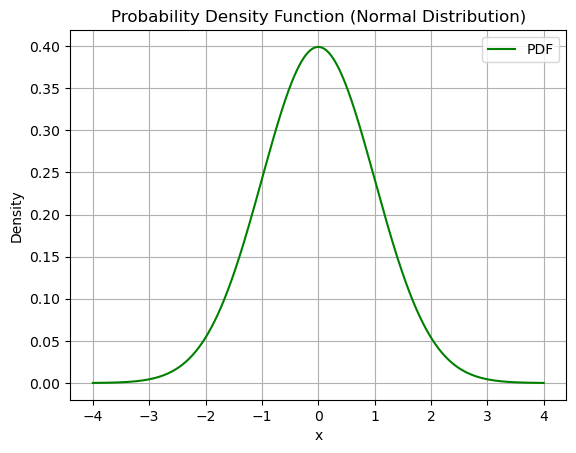

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create a range of x values
x = np.linspace(-4, 4, 1000)

# Compute the PDF of the standard normal distribution
pdf = norm.pdf(x, loc=0, scale=1)

# Plot
plt.plot(x, pdf, color='green', label='PDF')
plt.title('Probability Density Function (Normal Distribution)')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.savefig('../images/pdf.png')


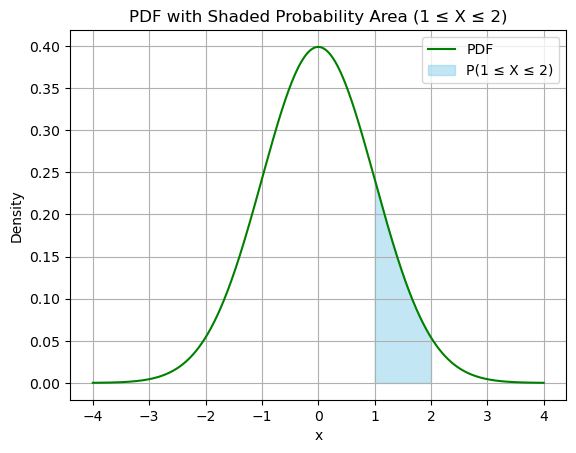

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# x values
x = np.linspace(-4, 4, 1000)

# PDF values
pdf = norm.pdf(x, loc=0, scale=1)

# Plot the PDF curve
plt.plot(x, pdf, label='PDF', color='green')

# Shade the area between x=1 and x=2
x_fill = np.linspace(1, 2, 1000)
y_fill = norm.pdf(x_fill, loc=0, scale=1)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.5, label='P(1 ≤ X ≤ 2)')

# Labels and title
plt.title('PDF with Shaded Probability Area (1 ≤ X ≤ 2)')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.savefig('../images/pdf_are.png')


### Parametric Density Estimation

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [19]:
sample.mean()

50.13816741003145

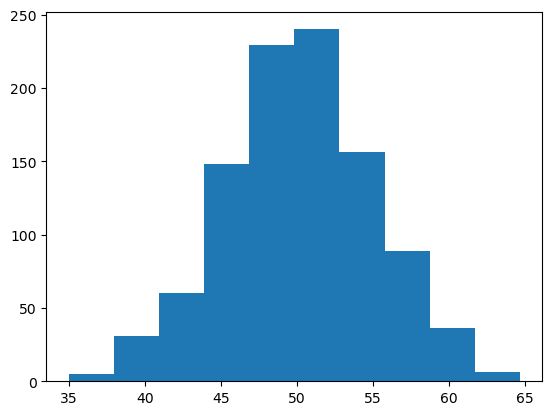

In [32]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)
plt.savefig('../images/parametric_density_before.png')

In [21]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [27]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean,sample_std)

In [28]:
values = np.linspace(sample.min(),sample.max(),100)

In [29]:
sample.max()

64.64217934820559

In [30]:
probabilities = [dist.pdf(value) for value in values]

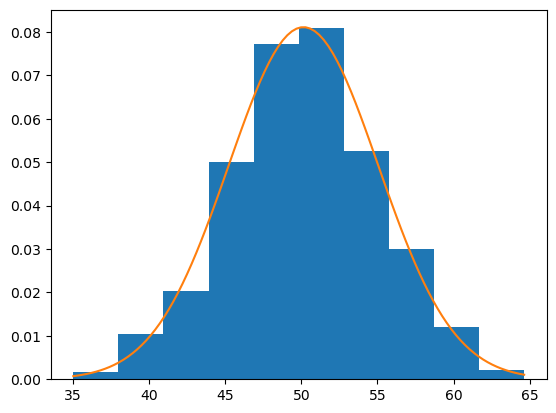

In [33]:
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)
plt.savefig('../images/parametic_density_after.png')

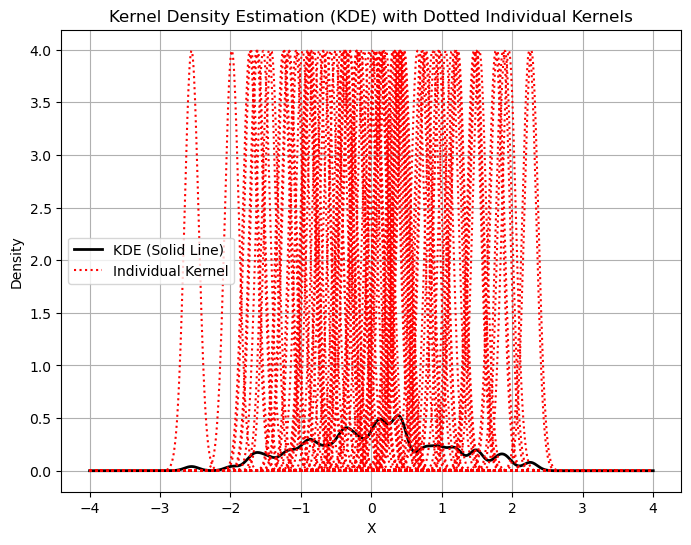

## Non Parametric Density EStimation (KDE)

In [35]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))
sample

array([29.41575349, 13.26120469, 13.64757501, 24.84698354, 14.13438297,
       29.71810593, 17.9319051 , 16.26272594, 29.61471013, 27.40257396,
       29.3377948 , 24.53022329, 15.69387157, 29.55032477, 18.65998315,
       24.01228198, 24.73625984, 19.22494953, 23.07039685, 24.61103336,
       21.88212766, 14.50299605, 21.49119087, 26.63192948, 16.5271607 ,
       19.2518273 , 17.82423224, 29.24631864, 23.36147379, 22.03730918,
       16.15041963, 22.69624596, 16.6283367 , 20.15915279, 16.82076961,
       23.38216647, 22.88295408, 18.95850622, 21.98003356, 14.53469246,
       12.54371204, 22.19695851, 20.83336748, 23.17515718, 31.91572387,
       24.72239743, 15.43588887, 25.58508144, 13.42046295, 17.69207698,
       19.65879197, 28.56671361, 16.27622589, 15.86780731, 19.50773738,
       16.68260857, 25.63317961, 14.60034246, 14.26265674, 17.81089978,
       17.50983775, 29.64766027, 24.74710403, 20.43775621, 13.87282241,
       24.22181488, 14.99892326, 12.27614452, 25.94014896, 21.58

(array([ 2.,  0.,  2.,  2.,  2.,  8.,  9., 13., 18.,  9., 29., 24., 23.,
        24., 18., 20., 16., 25., 18., 12.,  7.,  7., 11., 12.,  9., 21.,
        15., 22., 27., 49., 43., 46., 59., 58., 51., 74., 46., 31., 38.,
        30., 20., 16., 14.,  2.,  8.,  3.,  3.,  3.,  0.,  1.]),
 array([ 6.13703622,  7.13139297,  8.12574972,  9.12010648, 10.11446323,
        11.10881998, 12.10317674, 13.09753349, 14.09189024, 15.08624699,
        16.08060375, 17.0749605 , 18.06931725, 19.06367401, 20.05803076,
        21.05238751, 22.04674427, 23.04110102, 24.03545777, 25.02981452,
        26.02417128, 27.01852803, 28.01288478, 29.00724154, 30.00159829,
        30.99595504, 31.9903118 , 32.98466855, 33.9790253 , 34.97338205,
        35.96773881, 36.96209556, 37.95645231, 38.95080907, 39.94516582,
        40.93952257, 41.93387932, 42.92823608, 43.92259283, 44.91694958,
        45.91130634, 46.90566309, 47.90001984, 48.8943766 , 49.88873335,
        50.8830901 , 51.87744685, 52.87180361, 53.86616036,

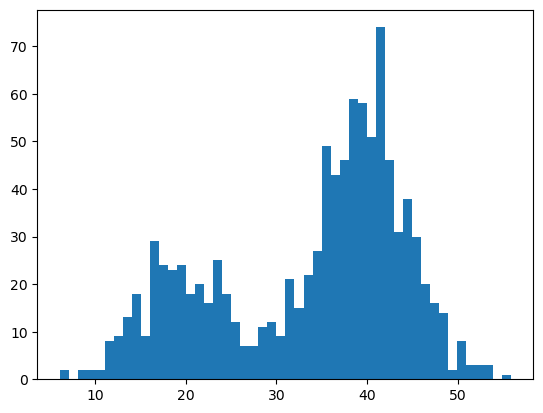

In [36]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [37]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [38]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [39]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

score_samples(values) returns the log-density estimate of the input samples values. This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

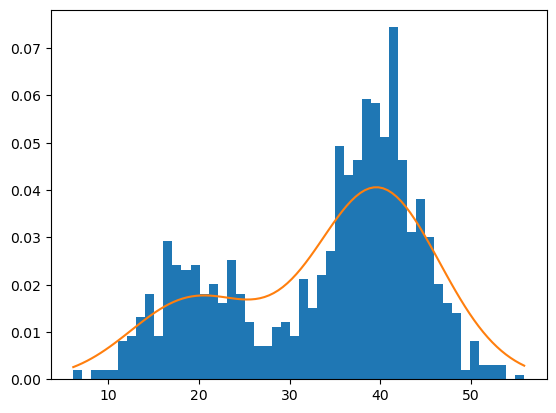

In [40]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

note : bandwidth = std , a hyperparameter for kde adjust for based by trial

## Visualizing Bandwidth (Standard Deviation) in KDE

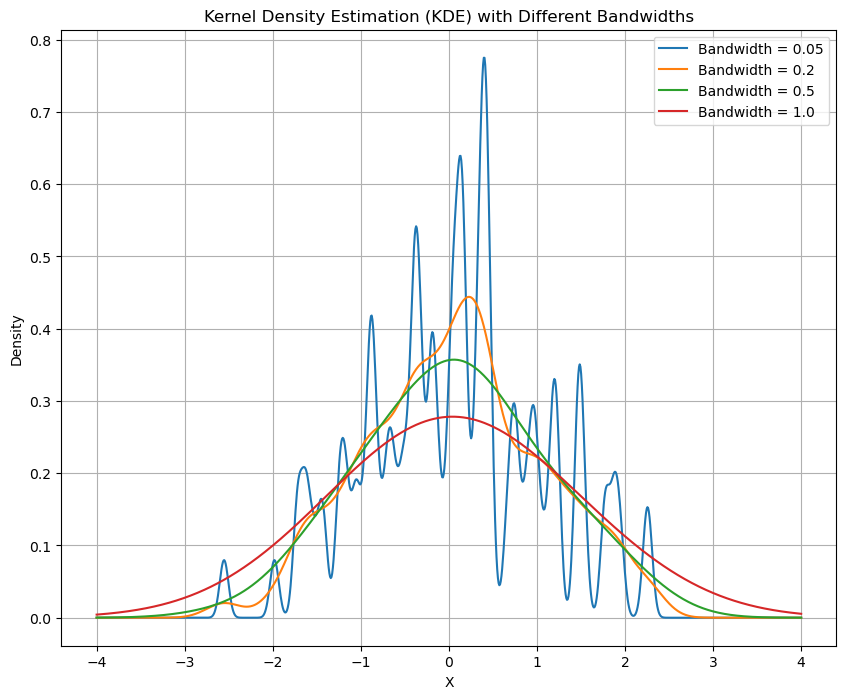

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate random data from a normal distribution
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=100)

# Define the kernel function (normal distribution kernel)
def kernel(x, mean, std):
    return norm.pdf(x, mean, std)

# Create a range of x values to plot the KDE
x = np.linspace(-4, 4, 1000)

# Bandwidths to test
bandwidths = [0.05, 0.2, 0.5, 1.0]

# Create the plot
plt.figure(figsize=(10, 8))

# Loop through different bandwidths
for bandwidth in bandwidths:
    # Calculate the KDE for the given bandwidth
    kde_values = np.zeros_like(x)
    for point in data:
        kde_values += kernel(x, point, bandwidth)  # Varying the bandwidth
    kde_values /= len(data)

    # Plot the KDE for this bandwidth
    plt.plot(x, kde_values, label=f'Bandwidth = {bandwidth}')

# Add title and labels
plt.title('Kernel Density Estimation (KDE) with Different Bandwidths')
plt.xlabel('X')
plt.ylabel('Density')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('../images/bandwidth.png')


## How to use PDF in Data science/Machine Learning

In [1]:
import seaborn as sns #----> to load dataset and visualizations
iris_dataset = sns.load_dataset('iris')
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

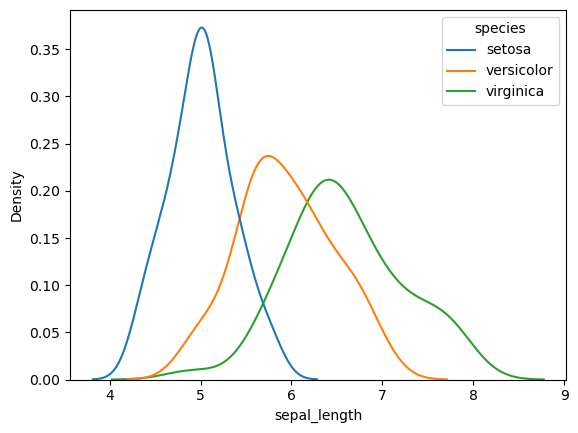

In [5]:
sns.kdeplot(data=iris_dataset,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

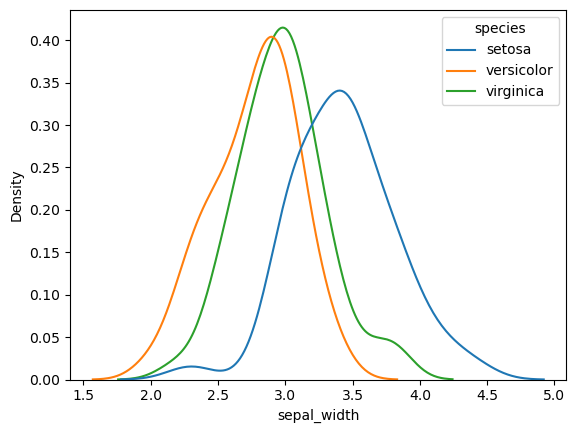

In [6]:
sns.kdeplot(data=iris_dataset,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

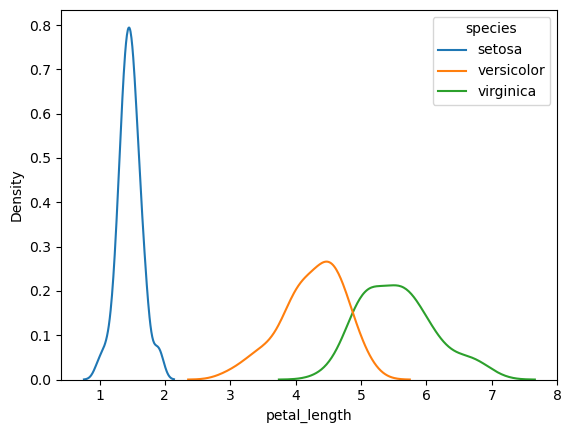

In [7]:
sns.kdeplot(data=iris_dataset,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

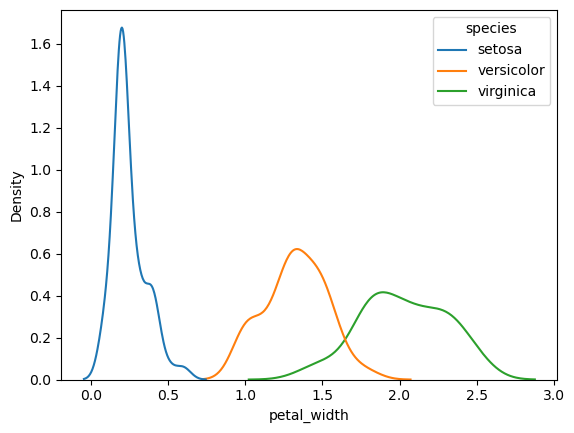

In [8]:
sns.kdeplot(data=iris_dataset,x='petal_width',hue='species')

In [9]:
# lets do another example on titanic dataset
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Density'>

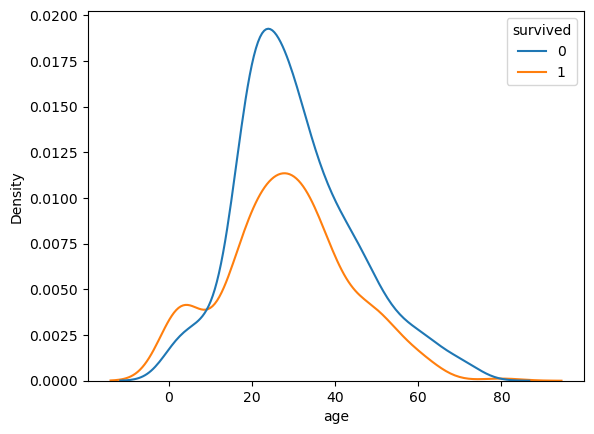

In [11]:
sns.kdeplot(data = titanic,x = 'age',hue='survived')

<Axes: xlabel='fare', ylabel='Density'>

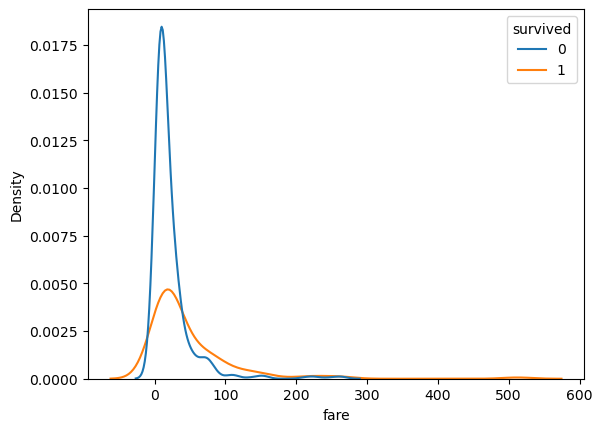

In [14]:
sns.kdeplot(data = titanic,x = 'fare',hue='survived')

## How to use CDF in data science

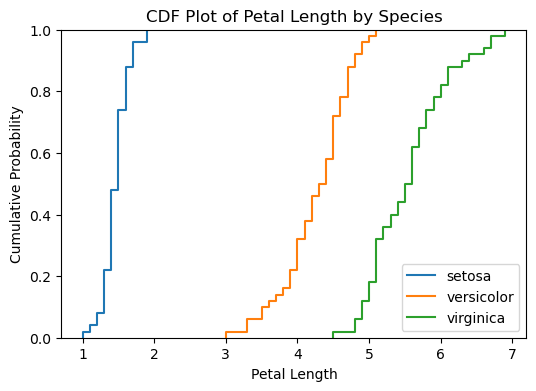

In [24]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = iris_data.target_names[iris_data.target]

# Rename columns for simplicity
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# CDF Plot for Petal Length
plt.figure(figsize=(6, 4))
for species in iris['species'].unique():
    subset = iris[iris['species'] == species]
    sns.ecdfplot(data=subset, x='petal_length', label=species)
plt.title('CDF Plot of Petal Length by Species')
plt.xlabel('Petal Length')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.savefig('../images/iris_cdf.png')


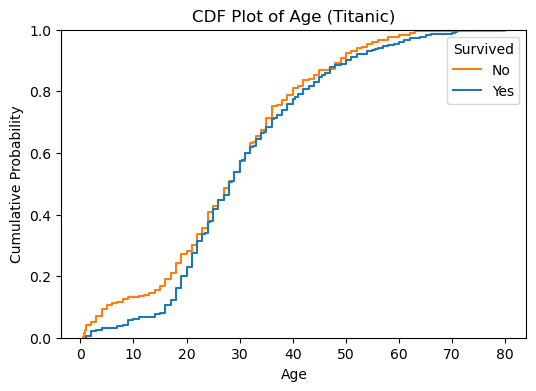

In [25]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Drop rows with null ages
titanic_age = titanic.dropna(subset=['age'])

# CDF Plot of Age
plt.figure(figsize=(6, 4))
sns.ecdfplot(data=titanic_age, x='age', hue='survived')
plt.title('CDF Plot of Age (Titanic)')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig('../images/titanic_cdf.png')
